In [1]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import pandas as pd

In [2]:
print("*"*10 + " Problem 1 " + "*"*10)

********** Problem 1 **********


# Problem 1

### 1.1

In [3]:
print("*"*10 + " Part 1 " + "*"*10)

********** Part 1 **********


In [4]:
# Define A = \begin{pmatrix}
#    2 & -4 & 2 & -14\\
#    -1 & 2 & -2 & 11\\
#    -1 & 2 & -1 & 7
# \end{pmatrix}
# and b = \begin{pmatrix}
#    10\\
#    -6\\
#    -5
# \end{pmatrix}

A = np.array([[2, -4, 2, -14], [-1, 2, -2, 11], [-1, 2, -1, 7]])
b = np.array([10, -6, -5])

In [5]:
print("Determinant of A^TA is:")
print(np.linalg.det(A.T @ A))

print("Determinant of AA^T is:")
print(np.linalg.det(A @ A.T))

Determinant of A^TA is:
0.0
Determinant of AA^T is:
0.0


In [6]:
# Report all he eigenvalues of A^TA and AA^T

print("Eigenvalues of A^TA are:")
print(np.linalg.eigvals(A.T @ A))

print("Eigenvalues of AA^T are:")
print(np.linalg.eigvals(A @ A.T))

Eigenvalues of A^TA are:
[4.03836162e+02 1.16383832e+00 1.44303001e-14 2.32329466e-15]
Eigenvalues of AA^T are:
[4.03836162e+02 1.16383832e+00 2.50613143e-15]


In [7]:
print("*"*10 + " Part 3 " + "*"*10)

********** Part 3 **********


### 1.3

In [8]:
# Report Lambda as the negative of the pseudo inverse of AA^T times b
# Report x^* as A^T times Lambda
# Also report ||Ax - b||^2 and 0.5 * ||x||^2

Lambda = -np.linalg.pinv(A @ A.T) @ b
x_star = -A.T @ Lambda
print("Lambda is:")
print(Lambda)
print("x^* is:")
print(x_star)
print("||Ax - b||^2 is:")
print(np.linalg.norm(A @ x_star - b)**2)
print("0.5 * ||x||^2 is:")
print(0.5 * np.linalg.norm(x_star)**2)

Lambda is:
[-0.6212766  -0.95744681  0.3106383 ]
x^* is:
[ 0.59574468 -1.19148936 -0.36170213 -0.34042553]
||Ax - b||^2 is:
3.62560472039577e-27
0.5 * ||x||^2 is:
1.0106382978723247


In [9]:
print(A @ x_star)

[10. -6. -5.]


In [10]:
print("*"*10 + " Part 5 " + "*"*10)

********** Part 5 **********


### 1.5

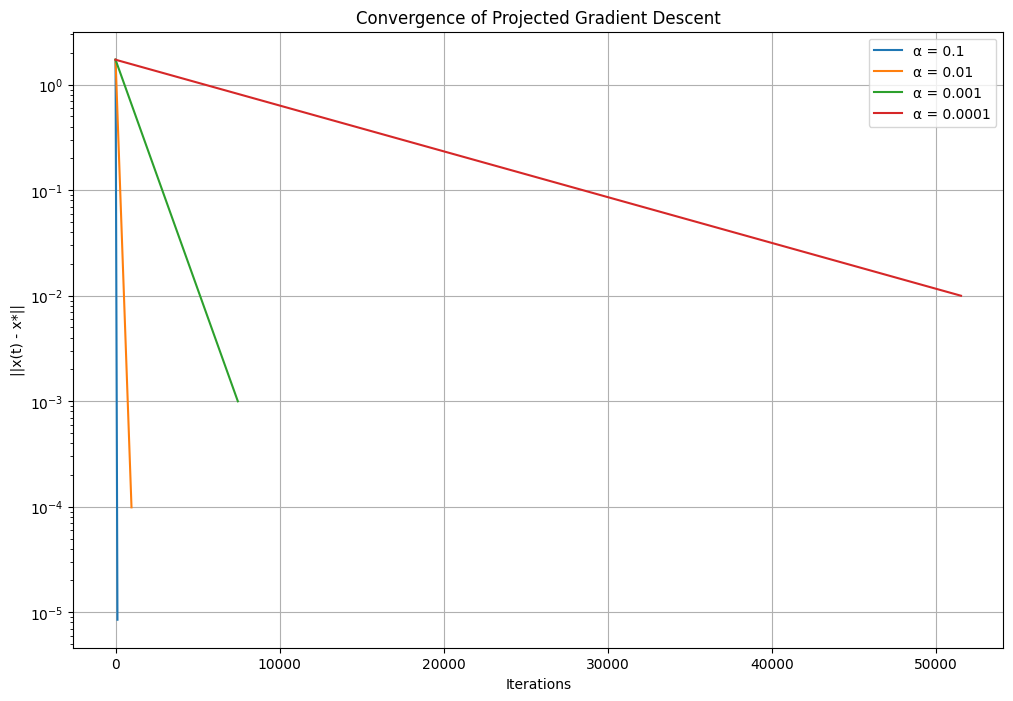

In [11]:
def projection_operator(A, z, b):
    """
    Projection operator using pseudoinverse
    
    Parameters:
    A: constraint matrix
    z: current point
    b: right-hand side vector
    
    Returns:
    Projected point
    """
    return z - A.T @ np.linalg.pinv(A @ A.T) @ (A @ z - b)

def projected_gradient_descent(x0, A, b, x_star, step_sizes, max_iter=100000):
    """
    Projected gradient descent solver
    
    Parameters:
    x0: initial point
    A, b: constraint matrix and vector
    x_star: optimal solution
    step_sizes: list of different step sizes to test
    max_iter: maximum number of iterations
    
    Returns:
    Dictionary of error trajectories for each step size
    """
    results = {}
    
    for alpha in step_sizes:
        x = x0.copy()
        errors = [np.linalg.norm(x - x_star)]
        
        for _ in range(max_iter):
            # Gradient descent step
            grad = x
            x_next = x - alpha * grad

            # Check if A x_next = b
            # If not, project back to feasible set

            if not np.allclose(A @ x_next, b):
                x_next = projection_operator(A, x_next, b)
            
            # Store error
            errors.append(np.linalg.norm(x_next - x_star))
            
            # Check convergence
            if np.linalg.norm(x_next - x) < 1e-6:
                break   
            x = x_next
        
        results[alpha] = errors
    
    return results

# Plotting
def plot_convergence(results):
    plt.figure(figsize=(12, 8))
    for alpha, errors in results.items():
        plt.semilogy(errors, label=f'α = {alpha}')
    
    plt.title('Convergence of Projected Gradient Descent')
    plt.xlabel('Iterations')
    plt.ylabel('||x(t) - x*||')
    plt.legend()
    plt.grid(True)
    plt.show()

# Set x0 = (0, -2, 1, 0)^T
x0 = np.array([0, -2, 1, 0])
step_sizes = [1e-1, 1e-2, 1e-3, 1e-4]

results = projected_gradient_descent(x0, A, b, x_star, step_sizes)
plot_convergence(results)

In [12]:
print("*"*10 + " Problem 2 " + "*"*10)

********** Problem 2 **********


# Problem 2

### 2.1

In [13]:
print("*"*10 + " Part 1 " + "*"*10)

********** Part 1 **********


In [14]:
# Load the data
X = pd.read_csv('Data.csv', header = None).values  # Features
y = pd.read_csv('Labels.csv', header = None).values.ravel()  # Labels

# Get dimensions
n_samples, n_features = X.shape

# Define variables
w = cp.Variable(n_features)  # Weight vector
b = cp.Variable()  # Bias term

# Define objective function: (1/2)||w||^2
objective = cp.Minimize(0.5 * cp.sum_squares(w))

# Define constraints: y_i(w^T x_i + b) >= 1
constraints = [
    cp.multiply(y, X @ w + b) >= 1
]

# Create and solve the problem
problem = cp.Problem(objective, constraints)
primal_value = problem.solve()

print(f"Primal objective value: {primal_value:.6f}")
print(f"Status: {problem.status}")
print(f"Number of samples: {n_samples}")
print(f"Number of features: {n_features}")
print(f"Optimal w norm: {np.linalg.norm(w.value):.6f}")

Primal objective value: 2.666463
Status: optimal
Number of samples: 10
Number of features: 2
Optimal w norm: 2.309313


In [15]:
print("*"*10 + " Part 4 " + "*"*10)

********** Part 4 **********


### 2.4

In [16]:
def solve_dual_svm(X, y, learning_rate=0.001, max_iter=1000000, tol=1e-9):
    n_samples = len(y)
    
    # Initialize dual variables
    lambda_values = np.ones(n_samples) / n_samples
    
    # Compute kernel matrix K[i,j] = -y[i]y[j]x[i]ᵀx[j]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = -y[i] * y[j] * np.dot(X[i], X[j])
    
    # Gradient ascent with modified projection
    prev_obj = float('-inf')
    for iteration in range(max_iter):
        # Compute gradient of objective: 1 + Kλ
        gradient = 1 + np.dot(K, lambda_values)
        
        # Update lambda values (this is z_i in the formula)
        z = lambda_values + learning_rate * gradient
        
        # Project according to the given formula
        # λᵢ = zᵢ - (1/N)(Σyⱼzⱼ)yᵢ
        sum_yz = np.sum(y * z)
        lambda_values = z - (1/n_samples) * sum_yz * y
        
        # Apply non-negativity constraint
        lambda_values = np.maximum(0, lambda_values)
        
        # Compute objective value
        obj_value = np.sum(lambda_values) + 0.5 * lambda_values.dot(K).dot(lambda_values)
        
        # Check convergence
        if abs(obj_value - prev_obj) < tol:
            break
        prev_obj = obj_value
    
    return lambda_values, obj_value, iteration

def train_dual_svm(X, y):
    # Run the optimization
    lambda_opt, dual_value, num_iterations = solve_dual_svm(X, y)
    print(f"\nOptimization completed after {num_iterations} iterations")
    print(f"Dual objective value: {dual_value:.6f}")

    # Calculate w using only support vectors
    support_vectors_mask = lambda_opt > 1e-6
    w = np.sum(lambda_opt[support_vectors_mask].reshape(-1, 1) * 
               y[support_vectors_mask].reshape(-1, 1) * 
               X[support_vectors_mask], axis=0)

    # Calculate b using support vectors
    b_candidates = y[support_vectors_mask] - np.dot(X[support_vectors_mask], w)
    b = np.mean(b_candidates)

    # Verify KKT conditions
    margins = y * (np.dot(X, w) + b)
    support_vectors = np.where(support_vectors_mask)[0]

    print("\nKKT Condition Verification:")
    print(f"Number of support vectors: {len(support_vectors)}")
    print("\nMargins for support vectors:")
    for idx in support_vectors:
        print(f"Index {idx}: margin = {margins[idx]:.6f}, lambda = {lambda_opt[idx]:.6f}")

    # Verify sum(λᵢyᵢ) = 0 constraint
    sum_lambda_y = np.sum(lambda_opt * y)
    print(f"\nSum of λᵢyᵢ: {sum_lambda_y:.6e}")

    return w, b, lambda_opt

In [17]:
w, b, lambda_opt = train_dual_svm(X, y)


Optimization completed after 17552 iterations
Dual objective value: 2.673735

KKT Condition Verification:
Number of support vectors: 4

Margins for support vectors:
Index 0: margin = 0.999743, lambda = 1.823139
Index 1: margin = 0.999901, lambda = 0.849884
Index 6: margin = 0.999645, lambda = 2.456700
Index 9: margin = 0.999999, lambda = 0.209249

Sum of λᵢyᵢ: 7.073640e-03


In [18]:
print(w, b)

[ 1.15452345 -1.99938719] 0.9997426357897754


In [19]:
# Print \sum lambda_i where y_i = 1
print(np.sum(lambda_opt[y == 1]))
# Print \sum lambda_i where y_i = -1
print(np.sum(lambda_opt[y == -1]))

2.6730228878971305
2.665949247660086


In [20]:
print("*"*10 + " Part 6 " + "*"*10)

********** Part 6 **********


### 2.6

In [21]:
active_indices = np.array([ 0,  1,  6, 9 ])

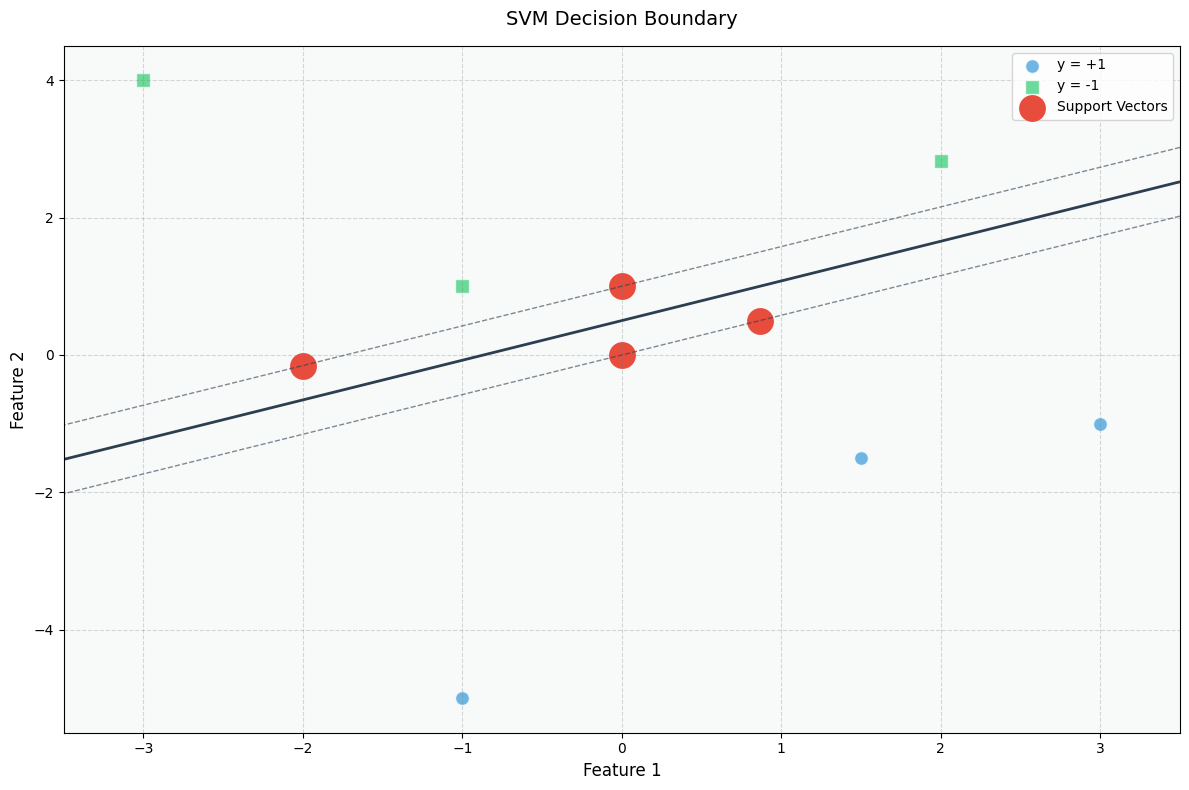

In [22]:
def plot_decision_boundary(X, w, b, margin=True):
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Plot decision boundary
    plt.figure(figsize=(12, 8))  # Changed to rectangular aspect ratio
    Z = (w[0] * xx + w[1] * yy + b)
    plt.contour(xx, yy, Z, levels=[0], colors='#2C3E50', linestyles='-', linewidths=2)
    
    if margin:
        # Plot margins with slightly transparent lines
        plt.contour(xx, yy, Z, levels=[-1], colors='#2C3E50', linestyles='--', linewidths=1, alpha=0.6)
        plt.contour(xx, yy, Z, levels=[1], colors='#2C3E50', linestyles='--', linewidths=1, alpha=0.6)
    
    plt.xlabel('Feature 1', fontsize=12)
    plt.ylabel('Feature 2', fontsize=12)
    plt.title('SVM Decision Boundary', fontsize=14, pad=15)
    return plt

def plot_data_points(X, y, plt):
    # Plot positive class points with enhanced colors
    pos_points = X[y == 1]
    plt.scatter(pos_points[:, 0], pos_points[:, 1], c='#3498DB', marker='o', 
               s=100, label='y = +1', alpha=0.7, edgecolors='white', linewidth=1)
    
    # Plot negative class points
    neg_points = X[y == -1]
    plt.scatter(neg_points[:, 0], neg_points[:, 1], c='#2ECC71', marker='s', 
               s=100, label='y = -1', alpha=0.7, edgecolors='white', linewidth=1)
    
    plt.legend(fontsize=10, framealpha=0.8)
    return plt

def highlight_support_vectors(X, active_indices, plt):
    # Highlight support vectors with enhanced styling
    plt.scatter(X[active_indices, 0], X[active_indices, 1], 
               c='#E74C3C', s=300, facecolors='none', 
               linewidth=2, label='Support Vectors')
    plt.legend(fontsize=10, framealpha=0.8)
    return plt

def plot_complete_svm(X, y, w, b, active_indices):
    # Plot decision boundary and margins
    plt = plot_decision_boundary(X, w, b, margin=True)
    
    # Add data points
    plt = plot_data_points(X, y, plt)
    
    # Highlight support vectors
    plt = highlight_support_vectors(X, active_indices, plt)
    
    # Set figure style
    plt.gca().set_facecolor('#F8F9F9')  # Light background
    plt.grid(True, linestyle='--', alpha=0.3, color='gray')
    
    # Add padding to prevent cutoff
    plt.tight_layout()
    
    return plt

plt = plot_complete_svm(X, y, w, b, active_indices)
plt.show()

In [23]:
# print w and b

print("Optimal w:")
print(w)
print("Optimal b:")
print(b)

Optimal w:
[ 1.15452345 -1.99938719]
Optimal b:
0.9997426357897754


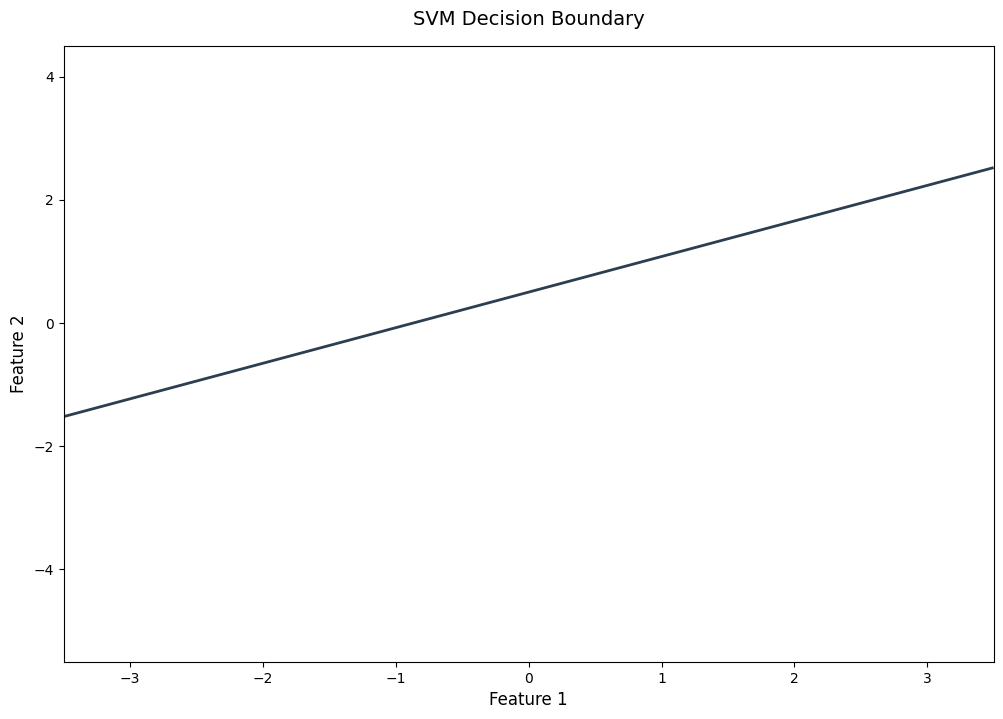

In [24]:
# Plot just the decision boundary
plt = plot_decision_boundary(X, w, b, margin=False)
plt.show()

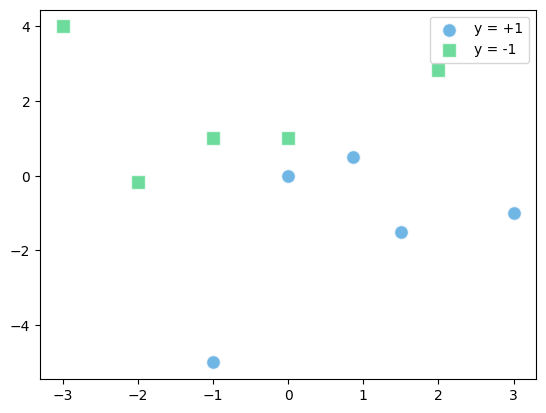

In [25]:
# Plot just the data points
plt = plot_data_points(X, y, plt)
plt.show()

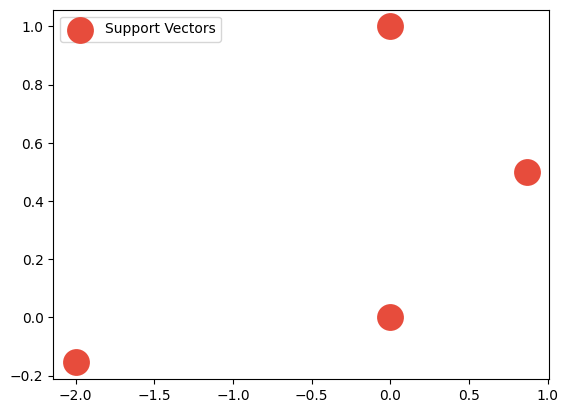

In [26]:
# Highlight support vectors
plt = highlight_support_vectors(X, active_indices, plt)
plt.show()

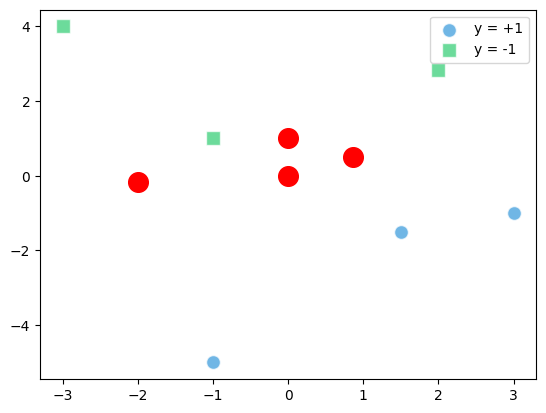

In [27]:
# Plot just the data points
plt = plot_data_points(X, y, plt)
# Make the support vectors larger and color them red
plt.scatter(X[active_indices, 0], X[active_indices, 1], c='red', s=200, label='Support Vectors')
plt.show()